In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('data.csv')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## EDA

In [3]:
data.shape

(13611, 17)

In [4]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

dataset have no null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

All features has correct data type

In [6]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


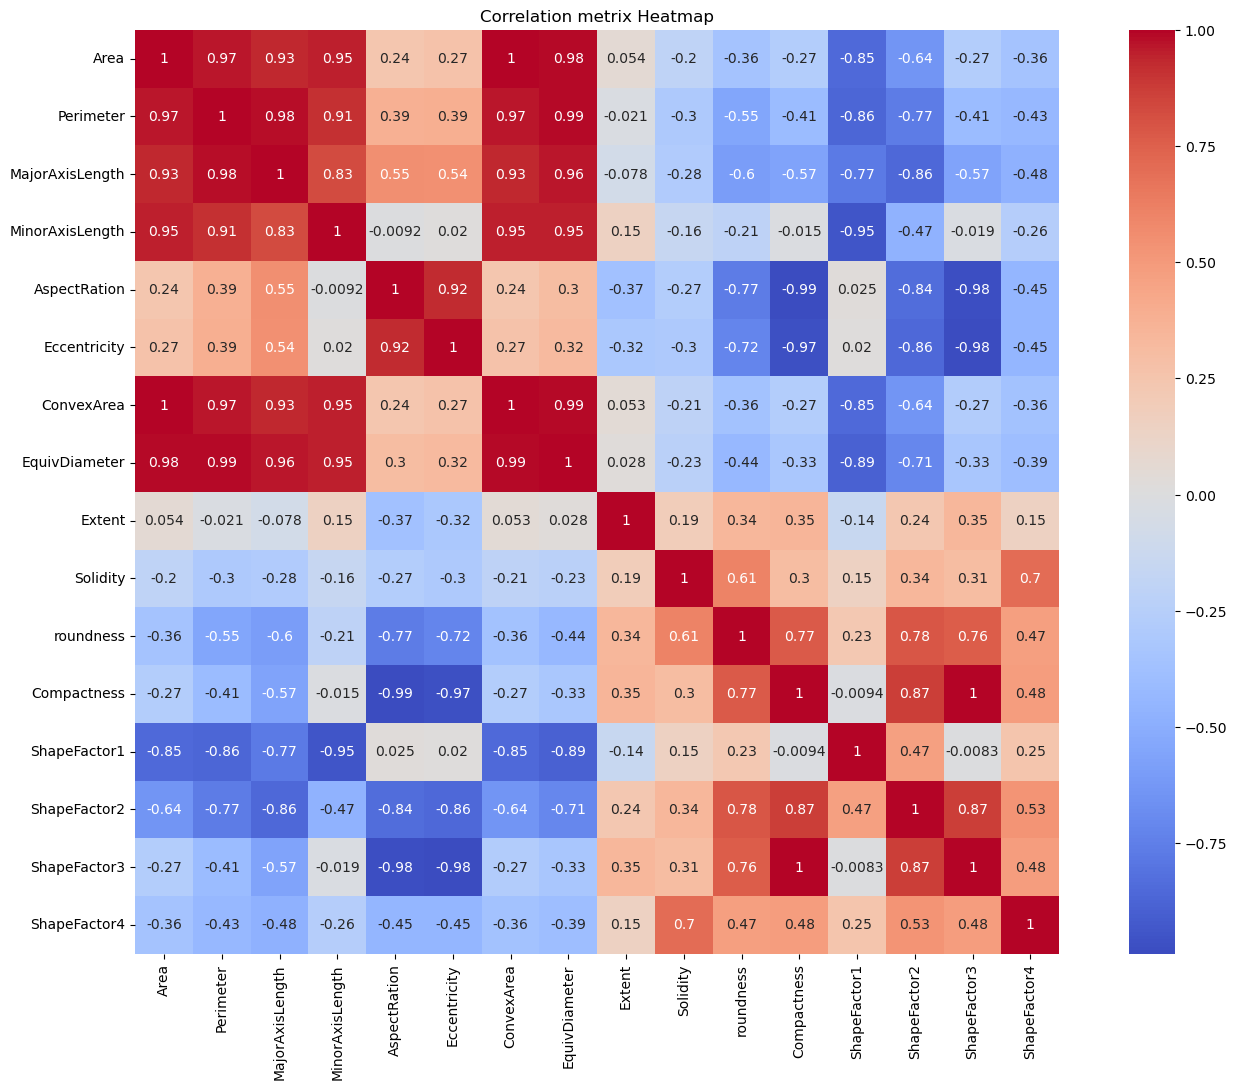

In [7]:
corr_metrix=data.corr()
plt.figure(figsize=(18,12)) 
sns.heatmap(corr_metrix, annot=True,cmap='coolwarm',square=True)
plt.title('Correlation metrix Heatmap')
plt.show()

Many columns are high correlated

In [8]:
#check the duplicates
data.duplicated().sum()

68

In [9]:
#drop the duplicate
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

All duplicates succesfully removed.

## Check the unique values of all variables to identify any suspicious values or typo's

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [12]:
#dealing with categorical variable
categorical_variables=data.select_dtypes(include=['object'])
for column in categorical_variables:
    unique_values=data[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'Class': ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [13]:
data.describe(include='object')

,Class
count,13543
unique,7
top,DERMASON
freq,3546


In [14]:
# dealing with numerical variables
numerical_variables=data.select_dtypes(include=['int64','float64'])
for column in numerical_variables:
    unique_values=data[column].unique()
    print(f"Unique value for '{column}': {unique_values}")

Unique value for 'Area': [28395 28734 29380 ... 42139 42147 42159]
Unique value for 'Perimeter': [610.291 638.018 624.11  ... 759.321 763.779 772.237]
Unique value for 'MajorAxisLength': [208.1781167 200.5247957 212.8261299 ... 281.5399279 283.3826364
 295.142741 ]
Unique value for 'MinorAxisLength': [173.888747  182.7344194 175.9311426 ... 191.1879789 190.2757308
 182.2047159]
Unique value for 'AspectRation': [1.19719142 1.09735646 1.20971266 ... 1.47258175 1.48932623 1.61984139]
Unique value for 'Eccentricity': [0.54981219 0.41178525 0.56272732 ... 0.73406478 0.74105479 0.78669302]
Unique value for 'ConvexArea': [28715 29172 29690 ... 42494 42667 42600]
Unique value for 'EquivDiameter': [190.1410973 191.2727505 193.4109041 ... 231.6312612 231.6532475
 231.6862231]
Unique value for 'Extent': [0.76392252 0.78396813 0.77811325 ... 0.72993244 0.70538912 0.7889625 ]
Unique value for 'Solidity': [0.988856   0.9849856  0.98955877 ... 0.98989875 0.98781259 0.98964789]
Unique value for 'round

There is no suspicious value or typo's in any of the variables.

Data is cleaned now. So, I recheck it.

In [15]:
data.shape

(13543, 17)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [17]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [18]:
data.duplicated().sum()

0

# Identifying and Treating Outliers: IQR Method

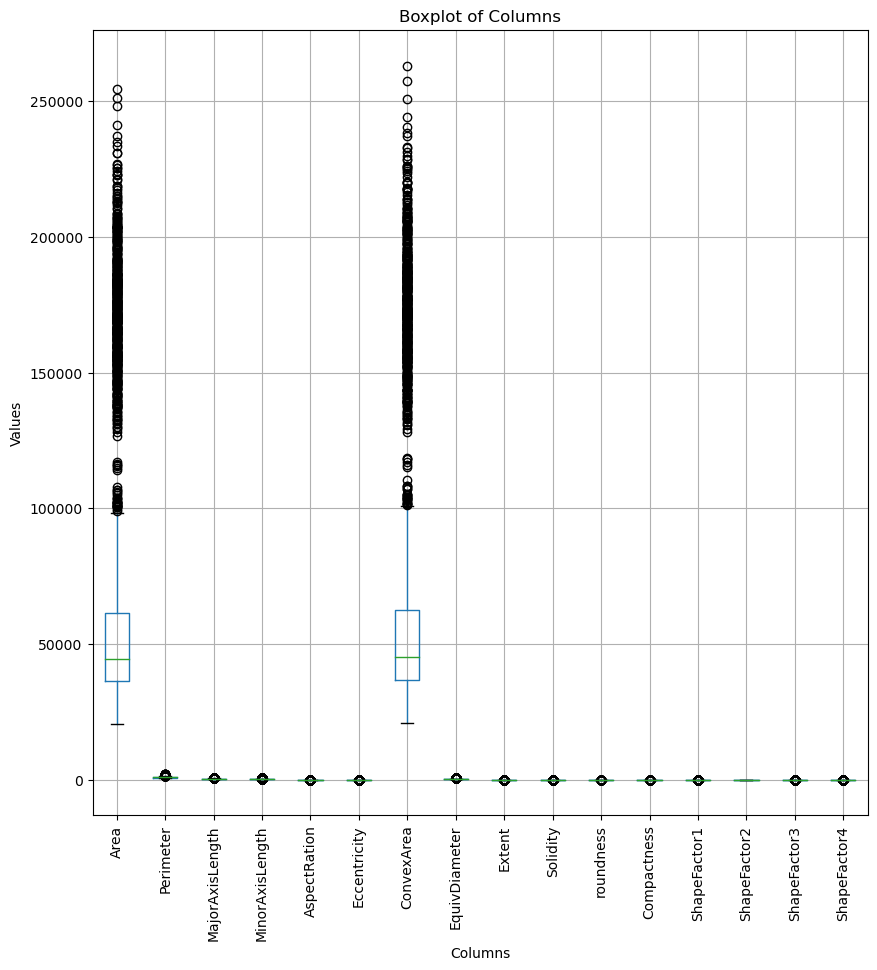

In [19]:
# Adjust figure size based on the number of columns
num_columns = len(data.columns)
fig, ax = plt.subplots(figsize=(10, 6))
if num_columns > 16:
    fig.set_size_inches(10, num_columns * 0.6)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
data.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

two columns having outlier: Area and convexArea

There is a large number of outliers present in the data. If I use the IQR method, a significant amount of data would be lost. So, I have decided to use the Z-score method.

# Identifying and Treating Outliers: Z-Score Method


In [20]:
#create a variable for all integer a float variables
numerical_columns=data.select_dtypes(include=['int','float']).columns

In [21]:
#calculate Z-score of all values of all variables and a new dataframe of it
z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = np.abs((data[column] - data[column].mean()) / data[column].std())

z_scores.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.838769,1.139621,1.301928,0.632088,1.565305,2.182752,0.839458,1.060452,0.287971,0.366463,1.420294,1.838560,0.681892,2.398191,1.924740,0.838648
1,0.827235,1.010491,1.391118,0.435742,1.972387,3.685368,0.824145,1.041371,0.697572,0.465869,0.224978,2.497530,0.369538,3.097357,2.691347,0.771113
2,0.805257,1.075263,1.247761,0.586753,1.514249,2.042153,0.806788,1.005319,0.577937,0.517595,1.248933,1.763988,0.604351,2.231003,1.840082,0.917384
3,0.783891,0.973858,1.274194,0.440579,1.742896,2.740094,0.772142,0.970650,0.671277,2.248609,0.509569,2.082134,0.403239,2.511165,2.204225,0.202365
4,0.779400,1.093780,1.375699,0.268271,2.121456,4.535656,0.782428,0.963409,0.475458,0.804575,1.872365,2.768496,0.120211,3.267554,3.016222,0.940371


In [22]:
#Setting a threshold of 3 means that any value outside the range of -3 to +3 standard deviations is considered as outlier
threshold=3
outlier_rows=z_scores[(z_scores>threshold).any(axis=1)]
outlier_rows

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
1,0.827235,1.010491,1.391118,0.435742,1.972387,3.685368,0.824145,1.041371,0.697572,0.465869,0.224978,2.497530,0.369538,3.097357,2.691347,0.771113
4,0.779400,1.093780,1.375699,0.268271,2.121456,4.535656,0.782428,0.963409,0.475458,0.804575,1.872365,2.768496,0.120211,3.267554,3.016222,0.940371
11,0.747045,1.007976,1.275030,0.311609,1.889579,3.306122,0.747547,0.911704,0.746800,0.254131,1.422747,2.357505,0.184830,2.711715,2.525667,0.819282
14,0.744765,0.996115,1.256608,0.336777,1.827542,3.052445,0.747011,0.908091,0.643328,0.603872,1.329306,2.259311,0.216853,2.599243,2.410378,0.982435
18,0.740886,1.007473,1.252141,0.329164,1.827655,3.052887,0.743024,0.901953,0.418738,0.577970,1.511178,2.259617,0.205740,2.589563,2.410736,0.986004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12058,0.688832,0.661641,0.888469,0.624734,0.744225,0.557532,0.670749,0.820630,1.833358,3.277548,1.055108,0.624542,0.767406,0.920888,0.599497,2.580525
12116,0.679884,0.305484,0.520292,1.085360,0.866300,0.868974,0.651348,0.806844,0.247261,5.155219,3.483356,0.893408,1.560936,0.224445,0.898716,0.356757
12121,0.679442,0.505361,0.819222,0.695093,0.496899,0.240100,0.640491,0.806164,0.755123,7.011199,2.150389,0.355606,0.871561,0.685150,0.321195,1.980777
12132,0.677843,0.486732,0.806224,0.741276,0.396717,0.125642,0.661031,0.803706,0.686835,3.017606,2.266259,0.305553,0.891891,0.642693,0.270010,0.116644


In [23]:
data=data.drop(outlier_rows.index)

In [24]:
data.shape

(12414, 17)

Approx 8.34% is lost in outliers removal. Approx 9% data is lost till now after removing duplicates and outliers.

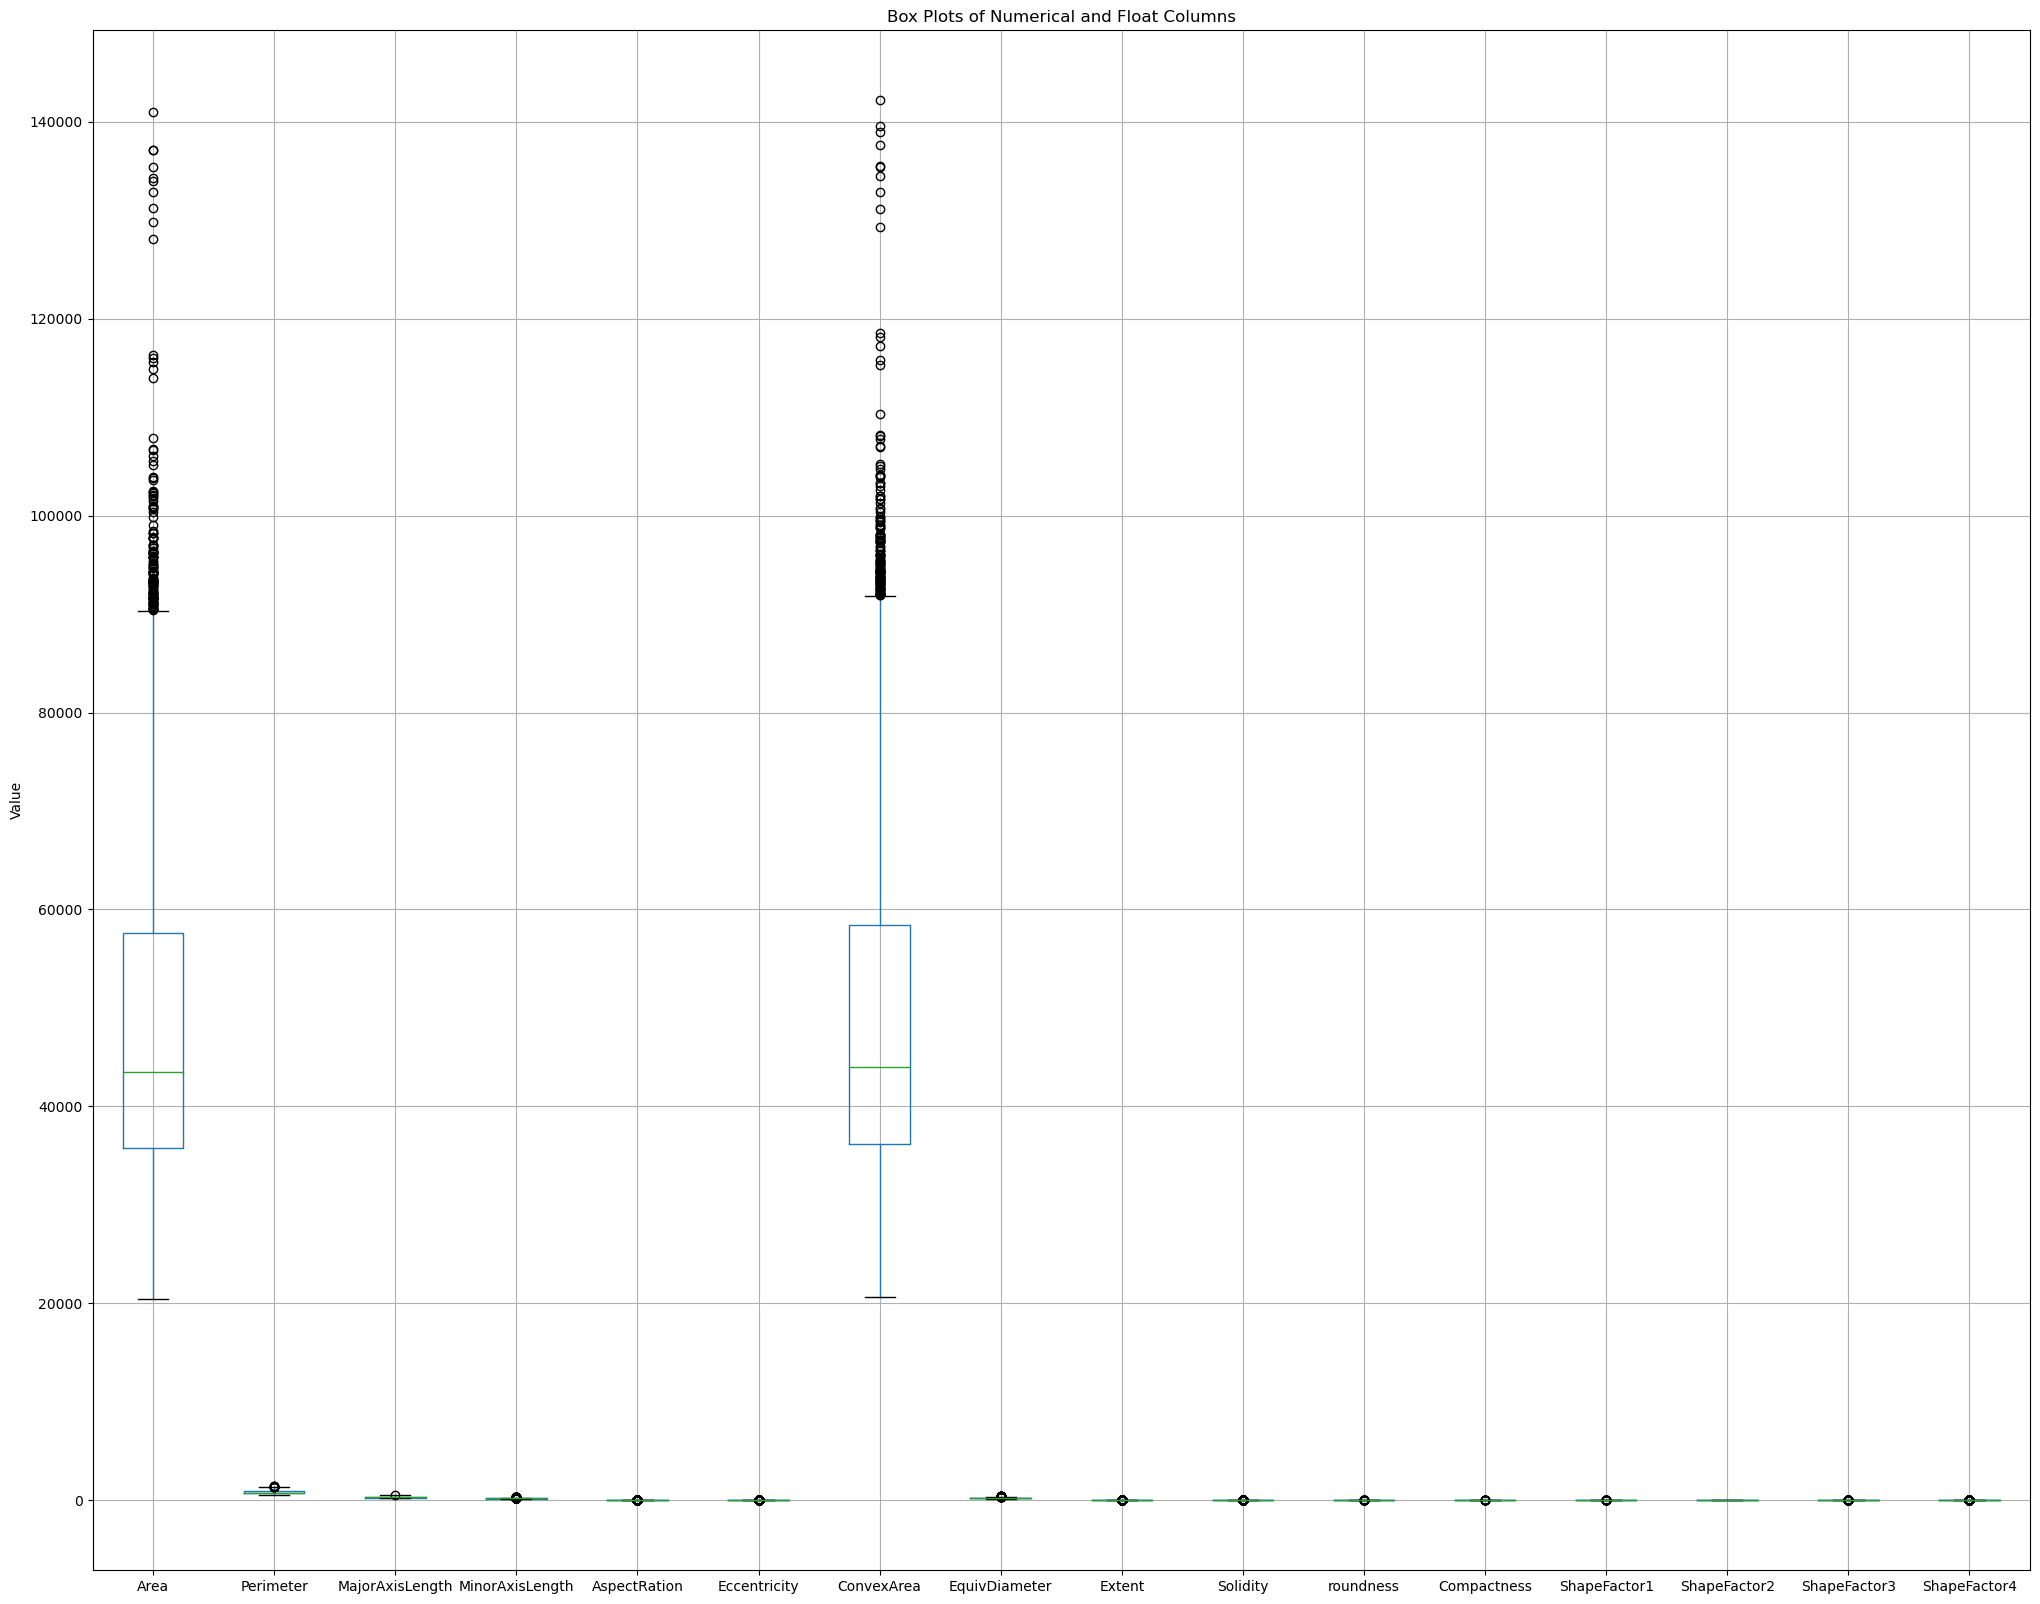

In [25]:
plt.figure(figsize=(25,20))
data[numerical_columns].boxplot()
plt.title('Box Plots of Numerical and Float Columns')
plt.ylabel('Value')
plt.show()

In [26]:
### Data is cleaned now. So, I make a copy of it.
data_clearned=data.copy()

# feature Encoding


In [27]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Class'], dtype='object')

In [28]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

I decide to apply df.replace method on 'Class' variable because this variable contains 7 categories

In [29]:
category_mapping = {
    'SEKER': 0,
    'BARBUNYA': 1,
    'BOMBAY': 2,
    'CALI': 3,
    'HOROZ': 4,
    'SIRA': 5,
    'DERMASON': 6
}

data['Class'] = data['Class'].replace(category_mapping)

In [30]:
data['Class'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [31]:
##check data types of all variables to confrim that all variables are in 'int' or 'float' 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12414 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             12414 non-null  int64  
 1   Perimeter        12414 non-null  float64
 2   MajorAxisLength  12414 non-null  float64
 3   MinorAxisLength  12414 non-null  float64
 4   AspectRation     12414 non-null  float64
 5   Eccentricity     12414 non-null  float64
 6   ConvexArea       12414 non-null  int64  
 7   EquivDiameter    12414 non-null  float64
 8   Extent           12414 non-null  float64
 9   Solidity         12414 non-null  float64
 10  roundness        12414 non-null  float64
 11  Compactness      12414 non-null  float64
 12  ShapeFactor1     12414 non-null  float64
 13  ShapeFactor2     12414 non-null  float64
 14  ShapeFactor3     12414 non-null  float64
 15  ShapeFactor4     12414 non-null  float64
 16  Class            12414 non-null  int64  
dtypes: float64(1

Data types of all variables are fine.

# Checking Distribution of data

In [32]:
data.shape

(12414, 17)

In [33]:
# Select appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = 12414
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 14


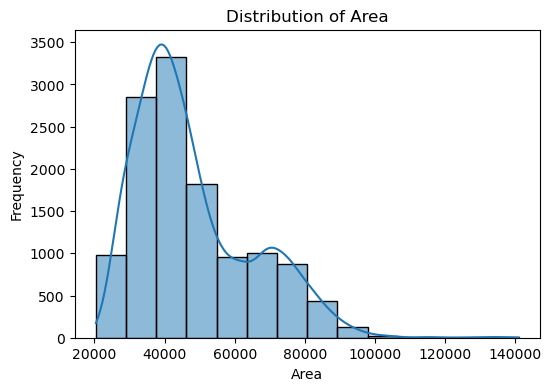

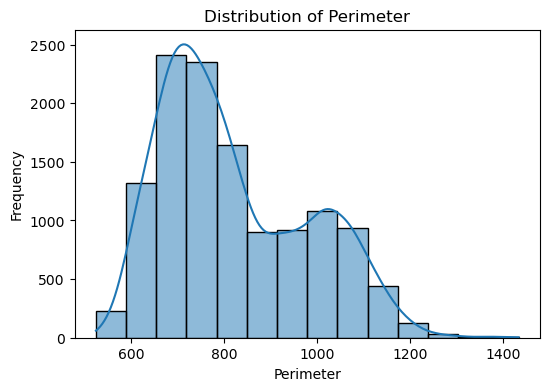

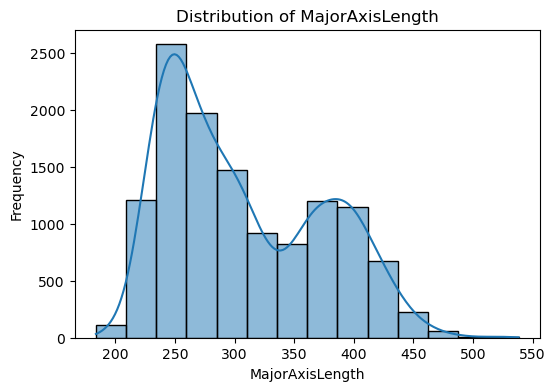

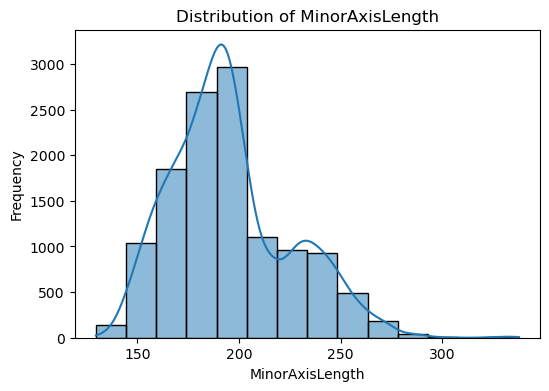

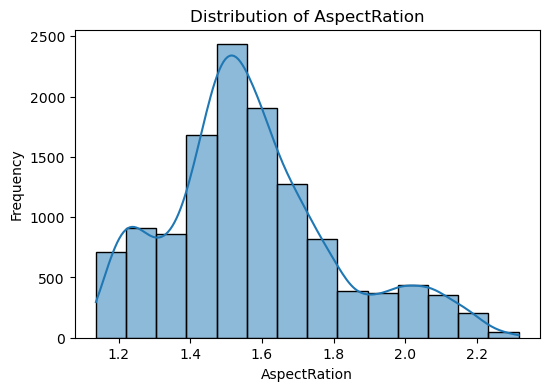

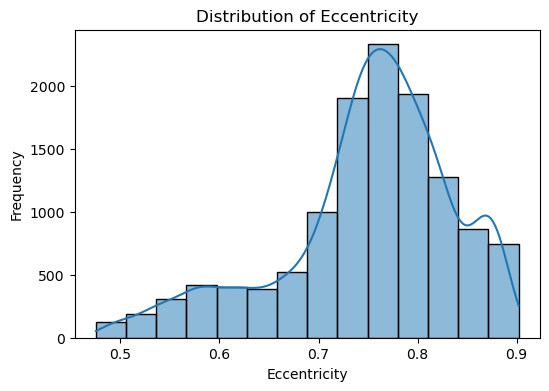

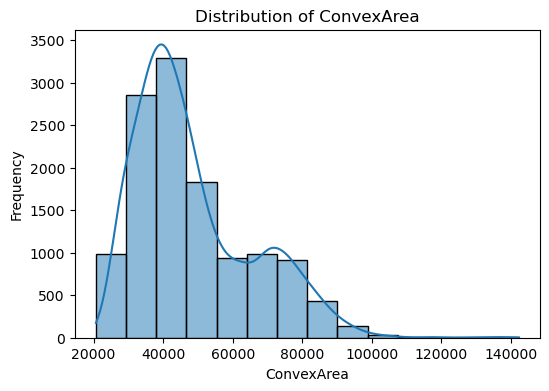

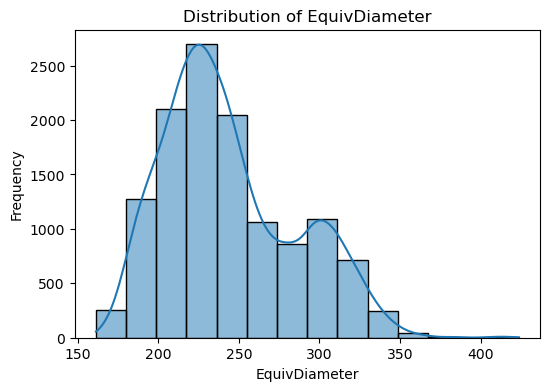

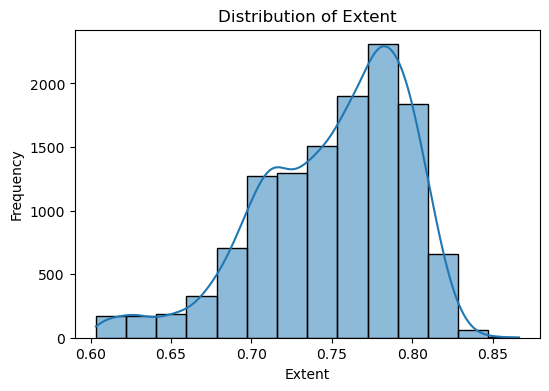

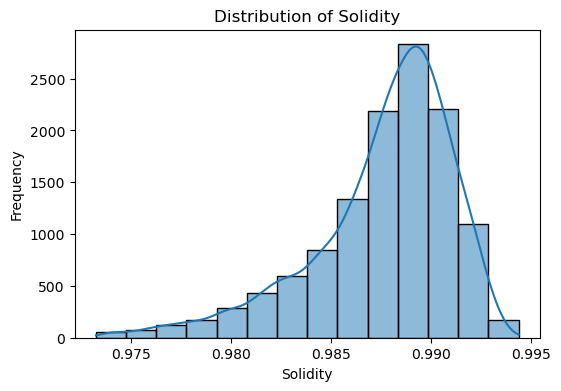

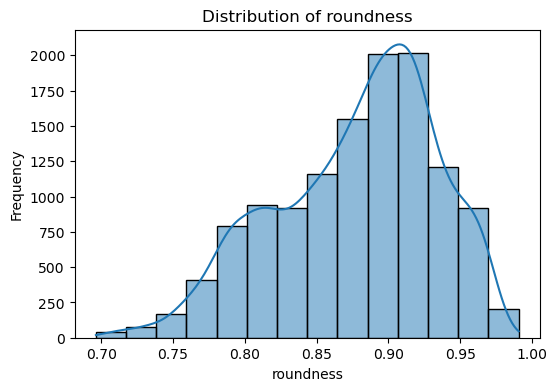

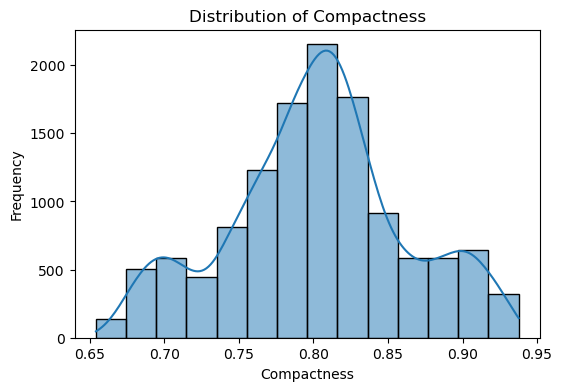

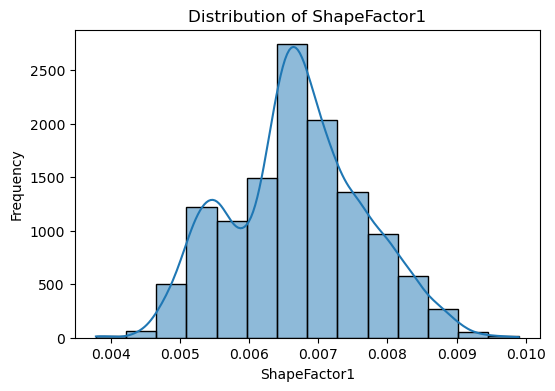

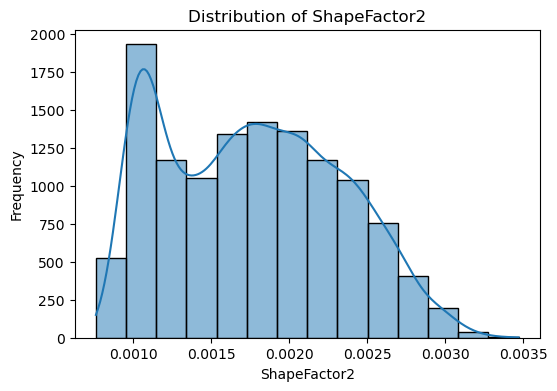

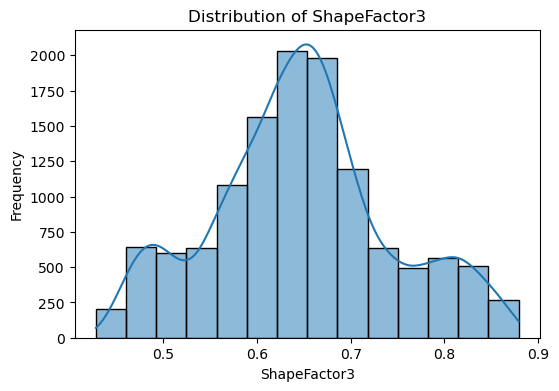

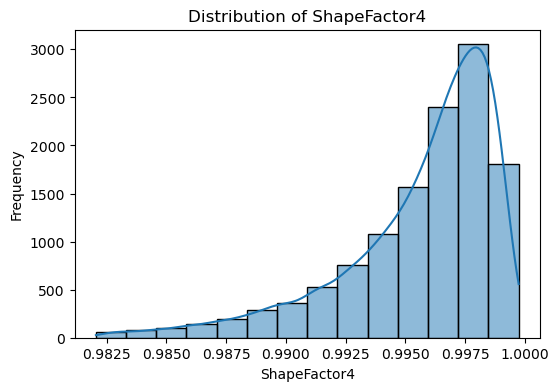

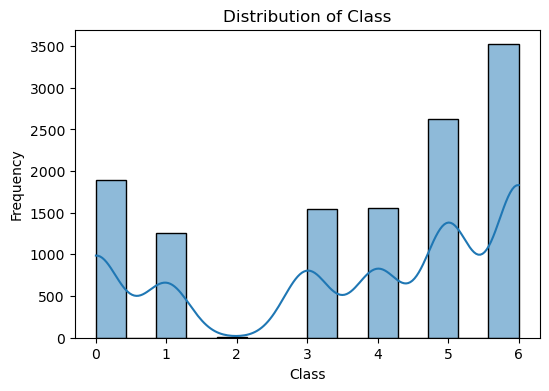

In [34]:
# check distribution of all continuous variables
continuous_vars = data.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if data[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=var, bins=14, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [35]:
#check skewness of all continuous variables
data[continuous_vars].skew()

Area               0.940250
Perimeter          0.602878
MajorAxisLength    0.519943
MinorAxisLength    0.663292
AspectRation       0.626851
Eccentricity      -0.834302
ConvexArea         0.942741
EquivDiameter      0.611550
Extent            -0.743348
Solidity          -1.164965
roundness         -0.495015
Compactness       -0.038839
ShapeFactor1       0.073565
ShapeFactor2       0.218911
ShapeFactor3       0.152033
ShapeFactor4      -1.456584
Class             -0.615489
dtype: float64

### Variables that are Approximately Symmetric (skewness between -0.5 and 0.5):

MajorAxisLength (0.519943)

ShapeFactor1 (0.073565)

ShapeFactor3 (0.152033)

### Variables that are moderately skewed (skewness between 0.5 to 1 or -0.5 to -1):

Perimeter (0.602878)

AspectRatio (0.626851)

Eccentricity (-0.834302)

EquivDiameter (0.611550)

Compactness (-0.038839)

ShapeFactor2 (0.218911)

### Variables that are highly skewed (skewness greater than 1 or less than -1)

Area (0.940250)

MinorAxisLength (0.663292)

ConvexArea (0.942741)

Extent (-0.743348)

Solidity (-1.164965)

Roundness (-0.495015)

ShapeFactor4 (-1.456584)

Class (-0.615489)

Most of the variables exhibit moderate to high skewness, indicating a departure from a normal distribution. However, since this is a classification problem, the skewness of the variables does not necessarily require transformation.

# Check colinearity between variables to avoid model from overfitting.

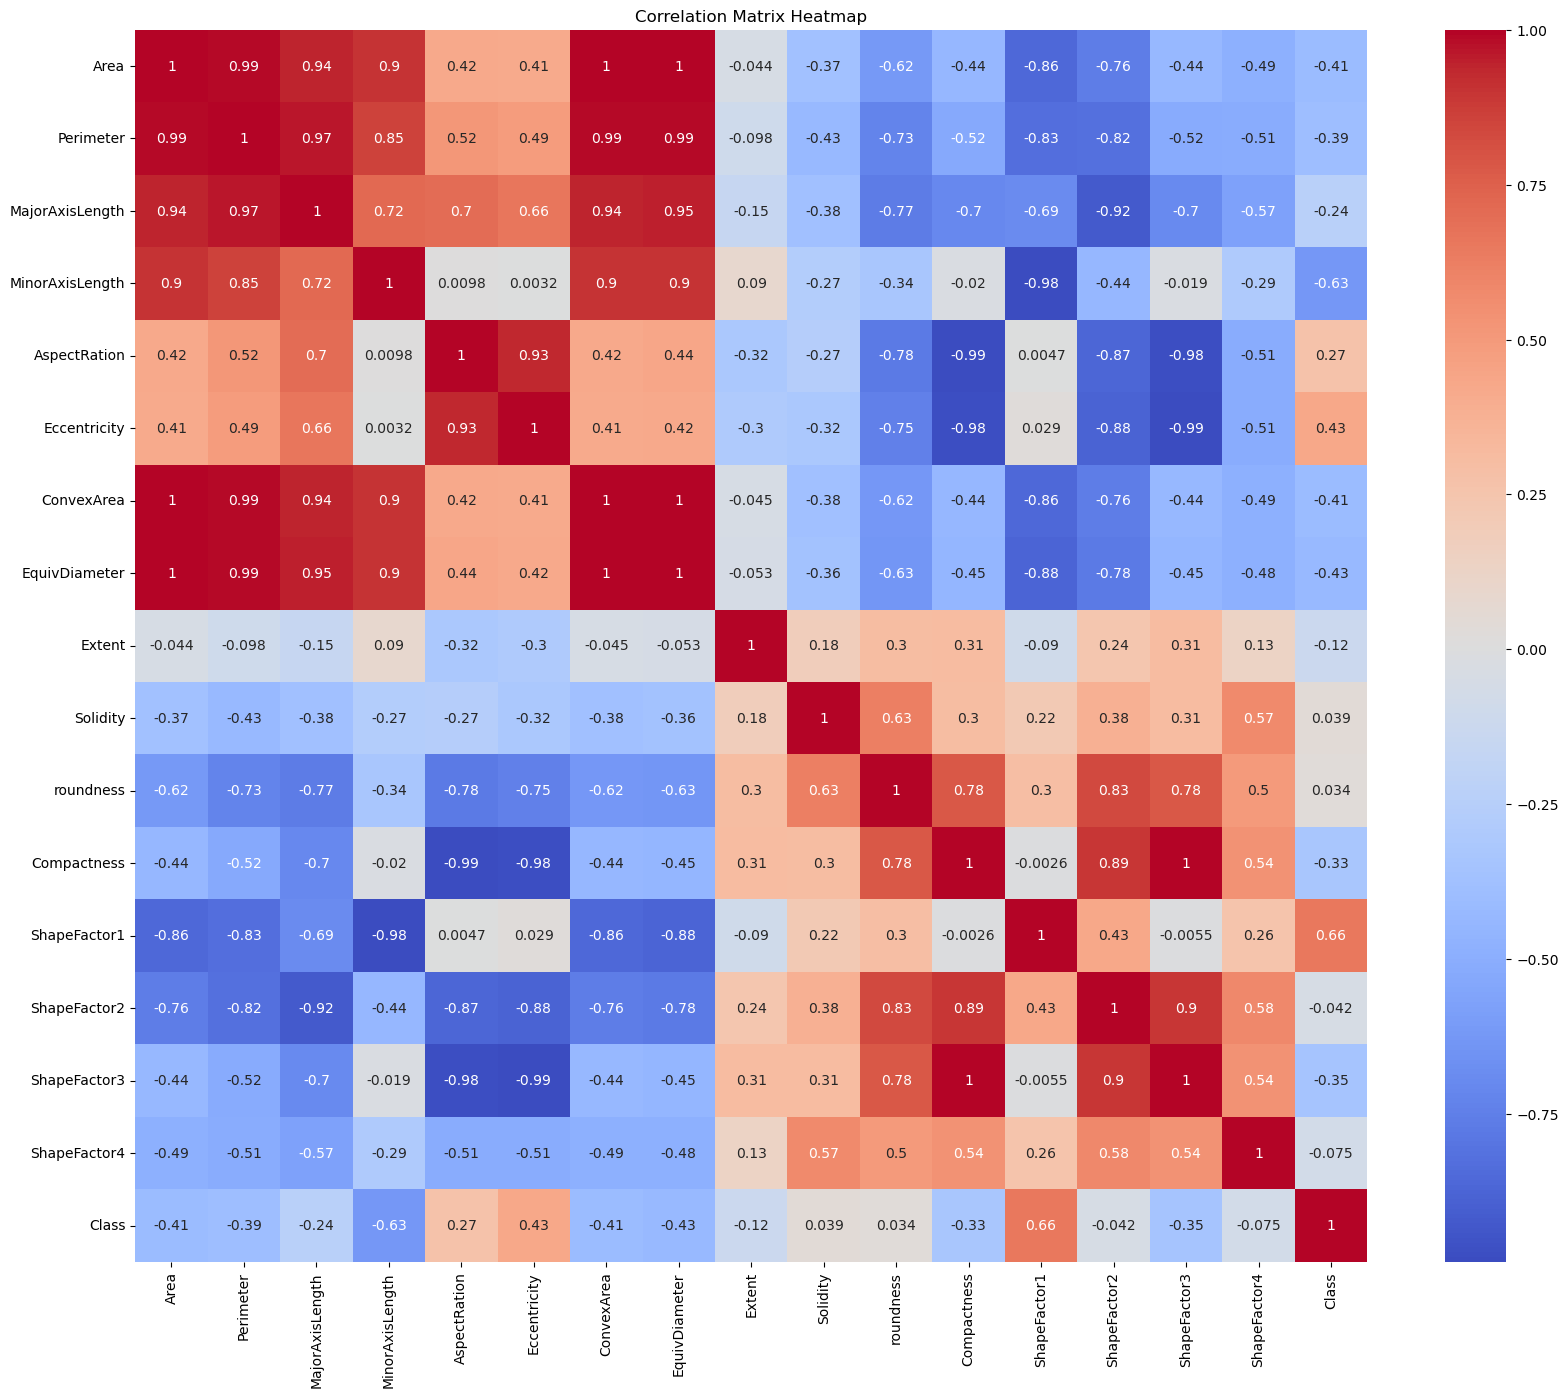

In [36]:
#checking colinearity between variables

corr_matrix = data.corr()

plt.figure(figsize=(20,16)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [37]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Find columns with correlation greater than 0.9 or less than -0.9
highly_correlated_cols = set()  # Use a set to avoid duplicates
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            correlation = corr_matrix.loc[col1, col2]
            if abs(correlation) >= 0.9:
                pair = tuple(sorted([col1, col2]))  # Sort columns to avoid duplicates
                highly_correlated_cols.add((pair, correlation))

# Display highly correlated columns with their correlation values
for i, ((col1, col2), correlation) in enumerate(highly_correlated_cols, start=1):
    print(f"{i}) Columns: {col1} and {col2} are highly correlated with a correlation of {correlation}")
    print("-" * 100)

1) Columns: ConvexArea and MajorAxisLength are highly correlated with a correlation of 0.9407354832162901
----------------------------------------------------------------------------------------------------
2) Columns: Area and MajorAxisLength are highly correlated with a correlation of 0.9407612267471149
----------------------------------------------------------------------------------------------------
3) Columns: ConvexArea and Perimeter are highly correlated with a correlation of 0.9860102280432066
----------------------------------------------------------------------------------------------------
4) Columns: EquivDiameter and Perimeter are highly correlated with a correlation of 0.9902241253710491
----------------------------------------------------------------------------------------------------
5) Columns: AspectRation and Eccentricity are highly correlated with a correlation of 0.9345147096764956
----------------------------------------------------------------------------------

### I decide to drop these variables because they have lowest correlation with Target Variable ("Class").

Perimeter

MajorAxisLength

EquivDiameter

AspectRation

Area

Compactness

ShapeFactor3

ConvexArea

MinorAxisLength

In [38]:
data.drop(['Perimeter', 'MajorAxisLength', 'EquivDiameter', 'AspectRation', 'Compactness', 'Area', 'ShapeFactor3', 
         'ConvexArea', 'MinorAxisLength'], axis=1, inplace=True)

In [39]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Find columns with correlation greater than 0.9 or less than -0.9
highly_correlated_cols = set()  # Use a set to avoid duplicates
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            correlation = corr_matrix.loc[col1, col2]
            if abs(correlation) >= 0.9:
                pair = tuple(sorted([col1, col2]))  # Sort columns to avoid duplicates
                highly_correlated_cols.add((pair, correlation))

# Display highly correlated columns with their correlation values
for i, ((col1, col2), correlation) in enumerate(highly_correlated_cols, start=1):
    print(f"{i}) Columns: {col1} and {col2} are highly correlated with a correlation of {correlation}")
    print("-" * 100)

Correlated variables dropped successfully

In [40]:
data.columns

Index(['Eccentricity', 'Extent', 'Solidity', 'roundness', 'ShapeFactor1',
       'ShapeFactor2', 'ShapeFactor4', 'Class'],
      dtype='object')

# Diving data into train and test set

In [41]:
x=data.drop('Class',axis=1)
y=data['Class']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [43]:
X_train.shape, y_train.shape

((8689, 7), (8689,))

In [44]:
X_test.shape, y_test.shape

((3725, 7), (3725,))

# Feature Scaling

In [45]:
data.head()

,Eccentricity,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
0,0.549812,0.763923,0.988856,0.958027,0.007332,0.003147,0.998724,0
2,0.562727,0.778113,0.989559,0.947849,0.007244,0.003048,0.999066,0
3,0.498616,0.782681,0.976696,0.903936,0.007017,0.003215,0.994199,0
5,0.520401,0.775688,0.989510,0.943852,0.007020,0.003153,0.999236,0
6,0.489478,0.762402,0.984081,0.853080,0.006925,0.003242,0.999049,0


In [46]:
columns_to_check = data.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (data[column] > 3).any() or (data[column] < -3).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than +3 or less than -3:")
print(columns_needs_to_be_scaled)

Columns with values greater than +3 or less than -3:
['Class']


In [47]:
columns_to_check = data.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (data[column] > 1).any() or (data[column] < 0).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than +3 or less than -3:")
print(columns_needs_to_be_scaled)

Columns with values greater than +3 or less than -3:
['Class']


There are no variables that require scaling in the dataset. All variables, except for the "Class" variable, are already within the range of 0-1. The target variable does not need scaling, so it is left as is.

# Check for the class imbalance

In [48]:
class_counts=data['Class'].value_counts()
class_counts

6    3520
5    2623
0    1896
4    1562
3    1543
1    1259
2      11
Name: Class, dtype: int64

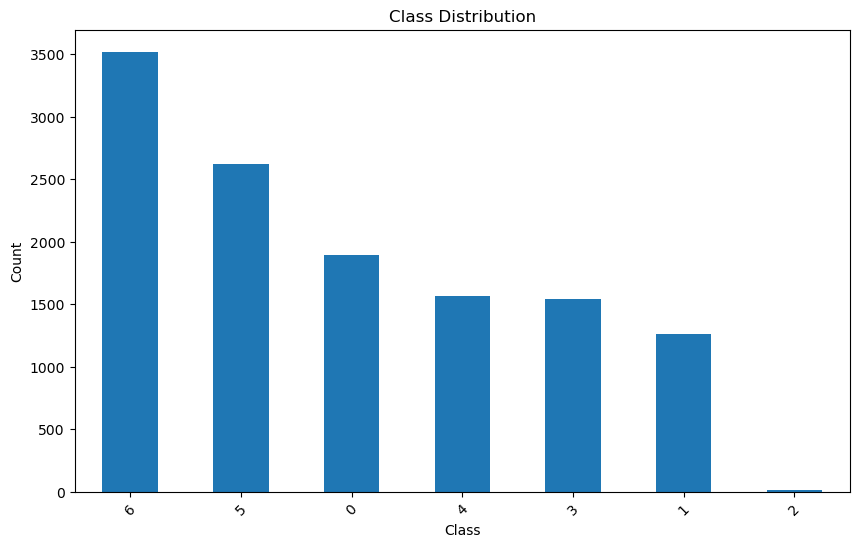

In [49]:
plt.figure(figsize=(10, 6)) 
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

There is a major problem of class imabalace.

# Handling Class Imbalance

#### I have decided to apply only oversampling techniques because undersampling techniques lead to a loss of data. I will evaluate the results of these techniques on the random forest model and select the one that provides the best outcome.

# SMOTE (Synthetic Minority Over-sampling Technique


In [50]:
#Applying Smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [51]:
#checking results of Smote

y_train_resampled.value_counts()

5    2503
1    2503
4    2503
6    2503
0    2503
3    2503
2    2503
Name: Class, dtype: int64

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf_classifier.predict(X_train_resampled)

classification_rep = classification_report(y_train_resampled, y_train_pred)
accuracy = accuracy_score(y_train_resampled, y_train_pred)
balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
precision = precision_score(y_train_resampled, y_train_pred, average='weighted', zero_division=0)
recall = recall_score(y_train_resampled, y_train_pred, average='weighted', zero_division=0)
f1 = f1_score(y_train_resampled, y_train_pred, average='weighted', zero_division=0)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2503
           1       1.00      1.00      1.00      2503
           2       1.00      1.00      1.00      2503
           3       1.00      1.00      1.00      2503
           4       1.00      1.00      1.00      2503
           5       1.00      1.00      1.00      2503
           6       1.00      1.00      1.00      2503

    accuracy                           1.00     17521
   macro avg       1.00      1.00      1.00     17521
weighted avg       1.00      1.00      1.00     17521

Accuracy: 1.0
Balanced Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [53]:
y_test_pred = rf_classifier.predict(X_test)

classification_rep = classification_report(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       559
           1       0.92      0.95      0.94       387
           2       0.50      1.00      0.67         1
           3       0.96      0.95      0.95       476
           4       0.96      0.96      0.96       501
           5       0.86      0.88      0.87       784
           6       0.92      0.90      0.91      1017

    accuracy                           0.92      3725
   macro avg       0.87      0.94      0.89      3725
weighted avg       0.92      0.92      0.92      3725

Accuracy: 0.9224161073825503
Balanced Accuracy: 0.9406505531565073
Precision: 0.9228895543176782
Recall: 0.9224161073825503
F1-score: 0.9225429815005837


# ADASYN (Adaptive Synthetic Sampling)

In [54]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [55]:
#checking results of SmoteTomek

y_train_resampled.value_counts()

1    2567
2    2506
6    2503
3    2476
4    2465
0    2461
5    2295
Name: Class, dtype: int64

In [56]:
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf_classifier.predict(X_train_resampled)

classification_rep = classification_report(y_train_resampled, y_train_pred)
accuracy = accuracy_score(y_train_resampled, y_train_pred)
balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
precision = precision_score(y_train_resampled, y_train_pred, average='weighted', zero_division=0)
recall = recall_score(y_train_resampled, y_train_pred, average='weighted', zero_division=0)
f1 = f1_score(y_train_resampled, y_train_pred, average='weighted', zero_division=0)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2461
           1       1.00      1.00      1.00      2567
           2       1.00      1.00      1.00      2506
           3       1.00      1.00      1.00      2476
           4       1.00      1.00      1.00      2465
           5       1.00      1.00      1.00      2295
           6       1.00      1.00      1.00      2503

    accuracy                           1.00     17273
   macro avg       1.00      1.00      1.00     17273
weighted avg       1.00      1.00      1.00     17273

Accuracy: 1.0
Balanced Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [57]:
y_test_pred = rf_classifier.predict(X_test)

classification_rep = classification_report(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       559
           1       0.91      0.95      0.93       387
           2       0.50      1.00      0.67         1
           3       0.95      0.93      0.94       476
           4       0.94      0.96      0.95       501
           5       0.87      0.86      0.87       784
           6       0.92      0.90      0.91      1017

    accuracy                           0.92      3725
   macro avg       0.86      0.94      0.89      3725
weighted avg       0.92      0.92      0.92      3725

Accuracy: 0.916241610738255
Balanced Accuracy: 0.93647674525212
Precision: 0.9162208867583495
Recall: 0.916241610738255
F1-score: 0.9160068486230364


#### Both SMOTE and ADASYN oversampling techniques achieved similar accuracy scores on the test data. SMOTE resulted in an accuracy of 0.9224, while ADASYN achieved an accuracy of 0.9162. Since accuracy is important in problem statement, it appears that SMOTE has a slightly higher accuracy on the test data compared to ADASYN.

In [58]:
#Applying Smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [59]:
y_train_resampled.value_counts()

5    2503
1    2503
4    2503
6    2503
0    2503
3    2503
2    2503
Name: Class, dtype: int64

In [60]:
X_train_resampled.shape, y_train_resampled.shape

((17521, 7), (17521,))

# Feature Selection using Random Forest Feature Importance Method

In [61]:
#building random forest model for feature selection using X_train_resampled and y_train_resampled

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train_resampled, y_train_resampled)

importances = rf_classifier.feature_importances_

feature_importance_data = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})

feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_data

,Feature,Importance
0,ShapeFactor1,0.339255
1,Eccentricity,0.205589
2,ShapeFactor2,0.176098
3,roundness,0.138000
4,ShapeFactor4,0.071907
5,Solidity,0.046856
6,Extent,0.022296


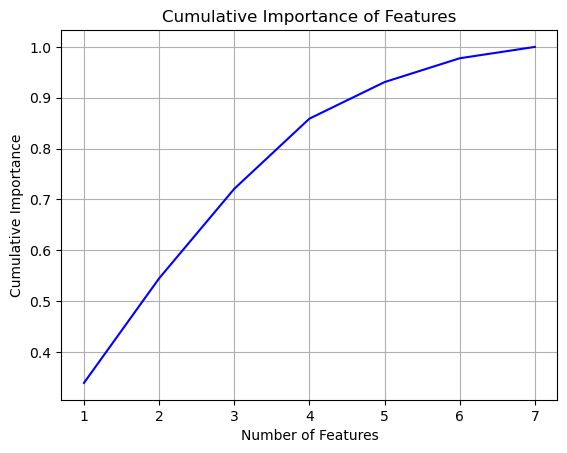

In [62]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

# Check multi-colinearity between variables to avoid model from overfitting.

In [63]:
#checking multicolinearity of X_train_resampled

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train_resampled.columns
vif["VIF"] = [variance_inflation_factor(X_train_resampled.values, i) for i in range(X_train_resampled.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
2,Solidity,197810.365425
6,ShapeFactor4,190689.148119
0,Eccentricity,3812.593601
3,roundness,1428.884958
5,ShapeFactor2,708.048315
4,ShapeFactor1,558.134965
1,Extent,306.614829


I have already removed correlated variables, but the remaining variables still contain multicollinearity. If I were to drop variables based on their VIF value, there would be no variables left for model building. Therefore, I have decided to continue the model building process without removing the multicollinear variables. If the model overfits or underfits, I will apply PCA.

# Model Building

In [64]:
#importing algorithms and time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import time

In [65]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_resampled, y_train_resampled)
    y_train_pred = algorithm.predict(X_train_resampled)

    accuracy = accuracy_score(y_train_resampled, y_train_pred)
    precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
    recall = recall_score(y_train_resampled, y_train_pred, average='weighted')
    f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Balanced Accuracy'].append(balanced_accuracy)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
data_train = pd.DataFrame(results_train)
data_train

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Algorithm,Accuracy,Precision,Recall,F1-score,Balanced Accuracy,Building Time (s)
0,LogisticRegression,0.728611,0.719692,0.728611,0.720430,0.728611,4.318524
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.416991
2,KNeighborsClassifier,0.898065,0.896117,0.898065,0.895951,0.898065,1.142098
3,GaussianNB,0.920952,0.921782,0.920952,0.921115,0.920952,0.040883
4,AdaBoostClassifier,0.834541,0.852369,0.834541,0.826781,0.834541,2.411270
5,GradientBoostingClassifier,0.969294,0.969473,0.969294,0.969365,0.969294,73.530662
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,2.603229
7,XGBClassifier,0.999829,0.999829,0.999829,0.999829,0.999829,22.256516
8,SVC,0.741510,0.745399,0.741510,0.740249,0.741510,86.449809


In [66]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

    results_test['Algorithm'].append(algorithm_name)
    results_test['Balanced Accuracy'].append(balanced_accuracy)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)
    

# Create a dataframe for the test data results
data_test = pd.DataFrame(results_test)
data_test

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Algorithm,Accuracy,Precision,Recall,F1-score,Balanced Accuracy
0,LogisticRegression,0.689128,0.731225,0.689128,0.702422,0.618724
1,DecisionTreeClassifier,0.881342,0.881103,0.881342,0.881016,0.905213
2,KNeighborsClassifier,0.716779,0.734833,0.716779,0.722647,0.786315
3,GaussianNB,0.904966,0.905253,0.904966,0.904841,0.926015
4,AdaBoostClassifier,0.808591,0.819106,0.808591,0.799033,0.817510
5,GradientBoostingClassifier,0.917584,0.917881,0.917584,0.917657,0.935755
6,RandomForestClassifier,0.922416,0.922890,0.922416,0.922543,0.940651
7,XGBClassifier,0.914631,0.915150,0.914631,0.914811,0.932512
8,SVC,0.693154,0.750443,0.693154,0.717590,0.765858


On the training set Random Forest, XG Boost and Gradient Boost have highest accuracy and balanced accuracy, but random forest overfits.

On the test set Random Forest, Gradient Boost and XG Boost have the highest accuracy and balanced accuracy.

I choose XG Boost for further analysis because it doesn't overfits and perform better on training and test data as compare to others.

In [67]:
#Make XG Boost Seprately

xgb_classifier = XGBClassifier(random_state=42)

xgb_classifier = xgb_classifier.fit(X_train_resampled, y_train_resampled)

xgb_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

# Hyperparameter Tunning (XG Boost)

In [68]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune and their respective values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [69]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predict the target values for the test data using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the performance on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Print the evaluation results and best hyperparameters
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:")
print(test_classification_rep)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Test Accuracy: 0.916241610738255
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       559
           1       0.91      0.95      0.93       387
           2       1.00      1.00      1.00         1
           3       0.95      0.94      0.95       476
           4       0.96      0.94      0.95       501
           5       0.85      0.88      0.86       784
           6       0.91      0.90      0.91      1017

    accuracy                           0.92      3725
   macro avg       0.93      0.93      0.93      3725
weighted avg       0.92      0.92      0.92      3725



After hypermeter tunning the accuracy is remain same or we can say accuracy is slightly better without hyperparameter tunning. So, I select XG Boost without hyperparameter tunning.

# Model Evaulation (XG Boost)

# Cross Validation

In [70]:
#cross validation of accuracy

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.9532097  0.94977169 0.95861872 0.96803653 0.97203196]

Mean Accuracy Score: 0.9603337209075098


# Train & Test Data Metrics

In [71]:
# Predict on the train data
y_train_pred = xgb_classifier.predict(X_train_resampled)

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred, average='macro')
train_recall = recall_score(y_train_resampled, y_train_pred, average='macro')
train_f1_score = f1_score(y_train_resampled, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Balanced Accuracy': [train_balanced_accuracy, test_balanced_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_data = pd.DataFrame(metrics_data)
metrics_data

,Dataset,Accuracy,Balanced Accuracy,Precision,Recall,F1-score
0,Train,0.999829,0.999829,0.999829,0.999829,0.999829
1,Test,0.914631,0.932512,0.861429,0.932512,0.885005


# Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix

# Predict on the training set
y_train_pred = xgb_classifier.predict(X_train_resampled)

# Predict on the test set
y_test_pred = xgb_classifier.predict(X_test)

# Define the category labels and their corresponding numbers
labels = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']
label_numbers = [0, 1, 2, 3, 4, 5, 6]

# Calculate the confusion matrix for the training set
train_confusion_matrix = confusion_matrix(y_train_resampled, y_train_pred, labels=label_numbers)

# Calculate the confusion matrix for the test set
test_confusion_matrix = confusion_matrix(y_test, y_test_pred, labels=label_numbers)

# Calculate the total number of samples in each set
train_total = len(y_train_resampled)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a DataFrame for the confusion matrix (training set)
confusion_matrix_data_train = pd.DataFrame(train_confusion_matrix_percent, columns=labels, index=labels)

# Display the confusion matrix DataFrame for the training set
print("Training Set Confusion Matrix:")
confusion_matrix_data_train

Training Set Confusion Matrix:


,SEKER,BARBUNYA,BOMBAY,CALI,HOROZ,SIRA,DERMASON
SEKER,14.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BARBUNYA,0.000000,14.285714,0.000000,0.000000,0.000000,0.000000,0.000000
BOMBAY,0.000000,0.000000,14.285714,0.000000,0.000000,0.000000,0.000000
CALI,0.000000,0.000000,0.000000,14.285714,0.000000,0.000000,0.000000
HOROZ,0.000000,0.000000,0.000000,0.000000,14.285714,0.000000,0.000000
SIRA,0.000000,0.000000,0.000000,0.000000,0.000000,14.280007,0.005707
DERMASON,0.000000,0.000000,0.000000,0.000000,0.000000,0.011415,14.274299


In [73]:
# Create a DataFrame for the confusion matrix (test set)
confusion_matrix_data_test = pd.DataFrame(test_confusion_matrix_percent, columns=labels, index=labels)

# Display the confusion matrix DataFrame for the test set
print("Test Set Confusion Matrix:")
confusion_matrix_data_test

Test Set Confusion Matrix:


,SEKER,BARBUNYA,BOMBAY,CALI,HOROZ,SIRA,DERMASON
SEKER,13.986577,0.214765,0.000000,0.000000,0.000000,0.402685,0.402685
BARBUNYA,0.026846,9.798658,0.026846,0.375839,0.053691,0.107383,0.000000
BOMBAY,0.000000,0.000000,0.026846,0.000000,0.000000,0.000000,0.000000
CALI,0.026846,0.563758,0.000000,12.000000,0.107383,0.080537,0.000000
HOROZ,0.000000,0.053691,0.000000,0.268456,12.617450,0.375839,0.134228
SIRA,0.268456,0.053691,0.000000,0.107383,0.375839,18.281879,1.959732
DERMASON,0.402685,0.000000,0.000000,0.000000,0.026846,2.120805,24.751678


# ROC-AUC Curve

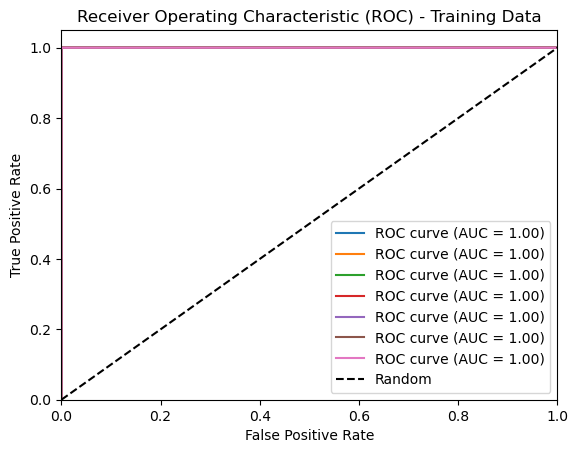

In [74]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert the training labels to binary format
y_train_bin = label_binarize(y_train_resampled, classes=[0, 1, 2, 3, 4, 5, 6])

# Compute the predicted probabilities for the training data
y_train_pred_prob = xgb_classifier.predict_proba(X_train_resampled)

# Compute the false positive rate (FPR) and true positive rate (TPR) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for class_idx in range(len(labels)):
    fpr[class_idx], tpr[class_idx], _ = roc_curve(y_train_bin[:, class_idx], y_train_pred_prob[:, class_idx])
    roc_auc[class_idx] = auc(fpr[class_idx], tpr[class_idx])

# Plot the ROC curve for each class
plt.figure()
for class_idx in range(len(labels)):
    plt.plot(fpr[class_idx], tpr[class_idx], label='ROC curve (AUC = %0.2f)' % roc_auc[class_idx])

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Training Data')
plt.legend(loc='lower right')
plt.show()

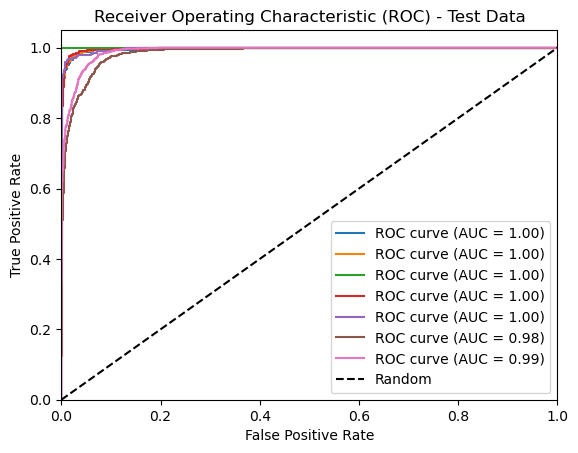

In [75]:
# Convert the test labels to binary format
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])

# Compute the predicted probabilities for the test data
y_test_pred_prob = xgb_classifier.predict_proba(X_test)

# Compute the false positive rate (FPR) and true positive rate (TPR) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for class_idx in range(len(labels)):
    fpr[class_idx], tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], y_test_pred_prob[:, class_idx])
    roc_auc[class_idx] = auc(fpr[class_idx], tpr[class_idx])

# Plot the ROC curve for each class
plt.figure()
for class_idx in range(len(labels)):
    plt.plot(fpr[class_idx], tpr[class_idx], label='ROC curve (AUC = %0.2f)' % roc_auc[class_idx])

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc='lower right')
plt.show()


# Important features in Model Building

In [76]:
feature_importance_data

,Feature,Importance
0,ShapeFactor1,0.339255
1,Eccentricity,0.205589
2,ShapeFactor2,0.176098
3,roundness,0.138000
4,ShapeFactor4,0.071907
5,Solidity,0.046856
6,Extent,0.022296


These are the feature on which model is build. "ShapeFactor1" & "Eccentricity" are the most important features as they contain approx 53% of information gain."

# Model Building with PCA

I found that many features are correlated and after removing features still all features contains multi-colinearity. So, I decide to apply PCA to remove colinearity and multi-colinearity between variables.

In [79]:
data_clearned

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [80]:
#Feature Encoding for PCA

category_mapping = {
    'SEKER': 0,
    'BARBUNYA': 1,
    'BOMBAY': 2,
    'CALI': 3,
    'HOROZ': 4,
    'SIRA': 5,
    'DERMASON': 6
}

data_clearned['Class'] = data_clearned['Class'].replace(category_mapping)

In [81]:
data_clearned.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,0
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,0


In [82]:
# Splitting the dataset into features (X) and target variable (y)
X = data_clearned.drop('Class', axis=1)  # Features
y = data_clearned['Class']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Printing the shapes of the resulting datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (8689, 16) (8689,)
Test set shape: (3725, 16) (3725,)


In [83]:
#Applying Smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [84]:
#checking results of Smote

y_train_resampled.value_counts()

5    2503
1    2503
4    2503
6    2503
0    2503
3    2503
2    2503
Name: Class, dtype: int64

In [87]:
X_train_resampled.shape, y_train_resampled.shape


((3725, 16), (3725,))

In [88]:
X_test.shape, y_test.shape


((3725, 16), (3725,))

In [89]:
#Feature Scaling for PCA

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

X_test_scaled = scaler.transform(X_test)

In [90]:
# Convert the scaled data back to a dataframe

X_train_resampled_scaled = pd.DataFrame(X_train_resampled_scaled, columns=X_train_resampled.columns)

X_train_resampled_scaled.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.762090,-0.849191,-0.862188,-0.700807,-0.479308,-0.224239,-0.763601,-0.801779,-0.150872,0.275039,0.625641,0.403248,0.686176,0.649520,0.369994,0.440955
1,-0.159009,0.175479,-0.049916,-0.093085,0.040699,0.295385,-0.143456,-0.056018,0.139061,-2.400709,-1.781202,-0.132640,-0.141800,-0.257266,-0.169121,0.936048
2,-0.710517,-0.607217,-0.224600,-1.188729,2.085631,1.420844,-0.709922,-0.731631,-3.002996,-0.196324,-1.013738,-1.808444,1.593765,-0.733937,-1.718729,0.032828
3,-0.998601,-1.189736,-1.135679,-1.099887,-0.318424,-0.046485,-1.001008,-1.144402,-1.232948,0.613426,0.830640,0.235713,1.392588,0.896867,0.199181,0.831087
4,-1.023785,-1.168762,-1.105355,-1.206946,-0.014377,0.247280,-1.022724,-1.183217,1.238482,-0.367992,0.171774,-0.092733,1.628653,0.691193,-0.129701,0.244523


Some features are in the range of 0-1 but I applied standard scaler on all variables because PCA assumes that the features are normally distributed and have a mean of 0 and a standard deviation of 1. If some of the features are not normally distributed or have different scales, then PCA may not be able to effectively reduce the dimensionality of the data.

In [91]:
# Apply PCA

from sklearn.decomposition import PCA


pca = PCA(random_state=42) 
X_train_pca = pca.fit(X_train_resampled)

In [92]:
# Get the explained variance ratio for all PCs
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each PC
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:f}")


PC1: 0.999983
PC2: 0.000015
PC3: 0.000001
PC4: 0.000000
PC5: 0.000000
PC6: 0.000000
PC7: 0.000000
PC8: 0.000000
PC9: 0.000000
PC10: 0.000000
PC11: 0.000000
PC12: 0.000000
PC13: 0.000000
PC14: 0.000000
PC15: 0.000000
PC16: 0.000000


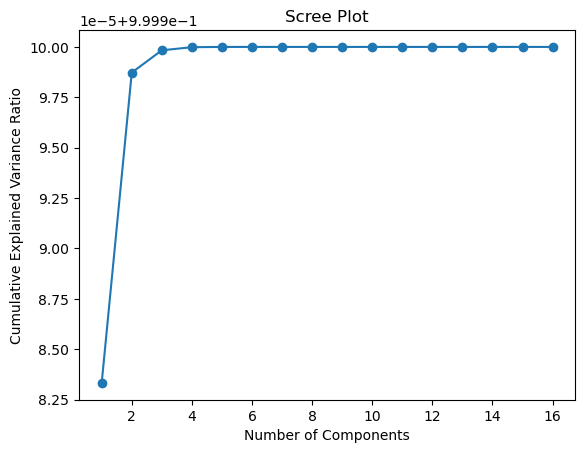

In [93]:
# Plot the scree plot

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

3 PC's contains all 100% variance of data. So, I decide to build model by taking 3 PC's.

In [94]:
pca = PCA(random_state=42, n_components=3)

X_train_pca = pca.fit_transform(X_train_resampled)

X_test_pca = pca.transform(X_test)

In [95]:
X_train_pca.shape, X_test_pca.shape

((17521, 3), (3725, 3))

In [96]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data with PCA
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_pca, y_train_resampled)
    y_train_pred = algorithm.predict(X_train_pca)

    accuracy = accuracy_score(y_train_resampled, y_train_pred)
    precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
    recall = recall_score(y_train_resampled, y_train_pred, average='weighted')
    f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Balanced Accuracy'].append(balanced_accuracy)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
data_train = pd.DataFrame(results_train)
data_train

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Algorithm,Accuracy,Precision,Recall,F1-score,Balanced Accuracy,Building Time (s)
0,LogisticRegression,0.649449,0.682035,0.649449,0.612610,0.649449,4.283551
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.249781
2,KNeighborsClassifier,0.881913,0.882672,0.881913,0.882019,0.881913,1.320007
3,GaussianNB,0.775070,0.776465,0.775070,0.773509,0.775070,0.086924
4,AdaBoostClassifier,0.525370,0.370476,0.525370,0.404165,0.525370,2.492710
5,GradientBoostingClassifier,0.895154,0.895359,0.895154,0.895170,0.895154,36.659285
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,2.124600
7,XGBClassifier,0.973346,0.973454,0.973346,0.973342,0.973346,13.479119
8,SVC,0.636779,0.635077,0.636779,0.628233,0.636779,83.035243


Random Forest Overfits and XG Boost has the highest accuracy on training set.

In [97]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

    results_test['Algorithm'].append(algorithm_name)
    results_test['Balanced Accuracy'].append(balanced_accuracy)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
data_test = pd.DataFrame(results_test)
data_test

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Algorithm,Accuracy,Precision,Recall,F1-score,Balanced Accuracy
0,LogisticRegression,0.587651,0.666476,0.587651,0.546386,0.639146
1,DecisionTreeClassifier,0.783893,0.788083,0.783893,0.785656,0.798545
2,KNeighborsClassifier,0.671678,0.678754,0.671678,0.674489,0.698427
3,GaussianNB,0.736107,0.745607,0.736107,0.738061,0.761558
4,AdaBoostClassifier,0.430872,0.240083,0.430872,0.294259,0.524197
5,GradientBoostingClassifier,0.843490,0.847301,0.843490,0.844923,0.853445
6,RandomForestClassifier,0.846443,0.848964,0.846443,0.847434,0.855234
7,XGBClassifier,0.834899,0.837789,0.834899,0.836094,0.845882
8,SVC,0.617181,0.629000,0.617181,0.617466,0.642170


RandomForestClassifier, GradientBoostingClassifier and XGBClassifier has the hightest accuracy on test data.

I decide to choose XG Boost model without PCA because it provides better result than all models with PCA.

# Save the model to a file

In [99]:
import joblib

model = xgb_classifier

joblib.dump(xgb_classifier, 'Turkish Bean Variety Classifier.pkl')

['Turkish Bean Variety Classifier.pkl']